In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import numpy as np

In [3]:
raw_permits = pd.read_csv('../data/Residential_Short_Term_Rental_Permits.csv')

In [4]:
raw_permits.head(5)

,Permit #,Applicant,Contact,Permit Subtype Description,Permit Status,Parcel,Date Entered,Date Issued,Expiration Date,Address,...,Permit Owner Addr. 2,Permit Owner Addr. 3,Permit Owner City,Permit Owner State,Permit Owner ZIP,Permit Type,Permit Subtype,Council District,Census Tract,Mapped Location
0,2022052402,Avery Owner 305 LLC,Stay Local Nashville,Short Term Rental � Multifamily,ISSUED,061030E30100CO,8/3/2022 0:00,8/10/2022 0:00,8/10/2023 0:00,4810 GALLATIN PIKE 305,...,3848 Hutson Ave,NaN,Nashville,TN,37216,CASR,CAZ10A003,7.0,37011100,"4810 GALLATIN PIKE 305\nNASHVILLE, TN 37216\n(..."
1,2022028676,"WOLF, BRIAN & ANNA MECHLING","WOLF, BRIAN & ANNA MECHLING",Short Term Rental � Multifamily,ISSUED,091024Y30300CO,4/29/2022 0:00,6/3/2022 0:00,6/3/2024 0:00,5403 CENTENNIAL BLVD 303,...,3609 CALDWELL CT,NaN,NASHVILLE,TN,37204,CASR,CAZ10A003,20.0,37013300,"5403 CENTENNIAL BLVD 303\nNASHVILLE, TN 37209\..."
2,201526366,"Uhl, Thomas W. & Juanita M.",Nieves Uhl,Short Term Rental - Non-Owner Occupied,ISSUED,7301018000,6/24/2015 0:00,6/24/2015 0:00,6/24/2024 0:00,2404 MILTON DR,...,5 Caminito De Montoya,NaN,Santa Fe,NM,87504,CASR,CAZ10A002,7.0,37011500,"2404 MILTON DR\nNASHVILLE, TN 37216\n(36.21023..."
3,201528484,"Schoenbrodt, Christa M.","Schoenbrodt, Christa M.",Short Term Rental - Owner Occupied,ISSUED,10408036300,7/7/2015 0:00,7/7/2015 0:00,7/7/2023 0:00,1709 VILLA PL,...,1709 VILLA PL,NaN,NASHVILLE,TN,37212,CASR,CAZ10A001,17.0,37016300,"1709 VILLA PL\nNASHVILLE, TN 37212\n(36.137262..."
4,2021041773,"BLAIN, DONNA L.",149 Bonita Parkway,Short Term Rental � Multifamily,ISSUED,092100M01700CO,7/1/2021 0:00,8/10/2021 0:00,8/10/2023 0:00,501 27TH AVE N 1,...,101 Affirmed Dr,NaN,Hendersonville,TN,37075,CASR,CAZ10A003,21.0,37014300,"501 27TH AVE N 1\nNASHVILLE, TN 37209\n(36.156..."


In [5]:
raw_permits

,Permit #,Applicant,Contact,Permit Subtype Description,Permit Status,Parcel,Date Entered,Date Issued,Expiration Date,Address,...,Permit Owner Addr. 2,Permit Owner Addr. 3,Permit Owner City,Permit Owner State,Permit Owner ZIP,Permit Type,Permit Subtype,Council District,Census Tract,Mapped Location
0,2022052402,Avery Owner 305 LLC,Stay Local Nashville,Short Term Rental � Multifamily,ISSUED,061030E30100CO,8/3/2022 0:00,8/10/2022 0:00,8/10/2023 0:00,4810 GALLATIN PIKE 305,...,3848 Hutson Ave,NaN,Nashville,TN,37216,CASR,CAZ10A003,7.0,37011100,"4810 GALLATIN PIKE 305\nNASHVILLE, TN 37216\n(..."
1,2022028676,"WOLF, BRIAN & ANNA MECHLING","WOLF, BRIAN & ANNA MECHLING",Short Term Rental � Multifamily,ISSUED,091024Y30300CO,4/29/2022 0:00,6/3/2022 0:00,6/3/2024 0:00,5403 CENTENNIAL BLVD 303,...,3609 CALDWELL CT,NaN,NASHVILLE,TN,37204,CASR,CAZ10A003,20.0,37013300,"5403 CENTENNIAL BLVD 303\nNASHVILLE, TN 37209\..."
2,201526366,"Uhl, Thomas W. & Juanita M.",Nieves Uhl,Short Term Rental - Non-Owner Occupied,ISSUED,7301018000,6/24/2015 0:00,6/24/2015 0:00,6/24/2024 0:00,2404 MILTON DR,...,5 Caminito De Montoya,NaN,Santa Fe,NM,87504,CASR,CAZ10A002,7.0,37011500,"2404 MILTON DR\nNASHVILLE, TN 37216\n(36.21023..."
3,201528484,"Schoenbrodt, Christa M.","Schoenbrodt, Christa M.",Short Term Rental - Owner Occupied,ISSUED,10408036300,7/7/2015 0:00,7/7/2015 0:00,7/7/2023 0:00,1709 VILLA PL,...,1709 VILLA PL,NaN,NASHVILLE,TN,37212,CASR,CAZ10A001,17.0,37016300,"1709 VILLA PL\nNASHVILLE, TN 37212\n(36.137262..."
4,2021041773,"BLAIN, DONNA L.",149 Bonita Parkway,Short Term Rental � Multifamily,ISSUED,092100M01700CO,7/1/2021 0:00,8/10/2021 0:00,8/10/2023 0:00,501 27TH AVE N 1,...,101 Affirmed Dr,NaN,Hendersonville,TN,37075,CASR,CAZ10A003,21.0,37014300,"501 27TH AVE N 1\nNASHVILLE, TN 37209\n(36.156..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14459,2021051022,"PINE STREET FLATS, LLC",1055 Pine St Apt 544,Short Term Rental � Multifamily,ISSUED,093130L00300CO,8/10/2021 0:00,9/2/2021 0:00,9/2/2023 0:00,1055 PINE ST 527,...,NaN,NaN,NASHVILLE,TN,37203,CASR,CAZ10A003,19.0,37019500,"1055 PINE ST 527\nNASHVILLE, TN 37203\n(36.152..."
14460,2018010900,"KING, CHERYL M.","KING, CHERYL M.",Short Term Rental - Non-Owner Occupied,EXPIRED,072090T00100CO,2/27/2018 0:00,3/5/2018 0:00,3/5/2019 0:00,941A SPAIN AVE,...,941 A SPAIN AVE,NaN,NASHVILLE,TN,37216,CASR,CAZ10A002,5.0,37011400,"941A SPAIN AVE\nNASHVILLE, TN 37216\n(36.20106..."
14461,2019044356,"NIC Velocity, LLC",The Guild,Short Term Rental � Multifamily,EXPIRED,093130B00200CO,7/25/2019 0:00,8/5/2019 0:00,8/5/2021 0:00,320 11TH AVE S 342,...,1033 DEMONBREUN ST STE 630,NaN,NASHVILLE,TN,37203,CASR,CAZ10A003,19.0,37019500,"320 11TH AVE S 342\nNASHVILLE, TN 37203\n(36.1..."
14462,2018049619,Benjamin Van Hoesen,Benjamin Van Hoesen,Short Term Rental - Owner Occupied,CANCELLED,8205004300,8/20/2018 0:00,9/7/2018 0:00,9/7/2020 0:00,1619 5TH AVE N,...,1619 5TH AV N,NaN,NASHVILLE,TN,37219,CASR,CAZ10A001,19.0,37019400,"1619 5TH AVE N\nNASHVILLE, TN 37208\n(36.18162..."


In [6]:
permits_year = raw_permits.value_counts('Date Issued')
permits_year

Date Issued
12/26/2018 0:00    128
12/20/2018 0:00    126
8/9/2022 0:00      100
5/23/2022 0:00      76
4/15/2022 0:00      75
                  ... 
4/11/2017 0:00       1
4/12/2016 0:00       1
11/20/2020 0:00      1
7/15/2021 0:00       1
4/21/2020 0:00       1
Length: 1985, dtype: int64

In [7]:
filtered_permits = raw_permits[raw_permits['Date Issued'] >= '2016-01-01']

In [8]:
filtered_permits.head(10)

,Permit #,Applicant,Contact,Permit Subtype Description,Permit Status,Parcel,Date Entered,Date Issued,Expiration Date,Address,...,Permit Owner Addr. 2,Permit Owner Addr. 3,Permit Owner City,Permit Owner State,Permit Owner ZIP,Permit Type,Permit Subtype,Council District,Census Tract,Mapped Location
0,2022052402,Avery Owner 305 LLC,Stay Local Nashville,Short Term Rental � Multifamily,ISSUED,061030E30100CO,8/3/2022 0:00,8/10/2022 0:00,8/10/2023 0:00,4810 GALLATIN PIKE 305,...,3848 Hutson Ave,NaN,Nashville,TN,37216,CASR,CAZ10A003,7.0,37011100,"4810 GALLATIN PIKE 305\nNASHVILLE, TN 37216\n(..."
1,2022028676,"WOLF, BRIAN & ANNA MECHLING","WOLF, BRIAN & ANNA MECHLING",Short Term Rental � Multifamily,ISSUED,091024Y30300CO,4/29/2022 0:00,6/3/2022 0:00,6/3/2024 0:00,5403 CENTENNIAL BLVD 303,...,3609 CALDWELL CT,NaN,NASHVILLE,TN,37204,CASR,CAZ10A003,20.0,37013300,"5403 CENTENNIAL BLVD 303\nNASHVILLE, TN 37209\..."
2,201526366,"Uhl, Thomas W. & Juanita M.",Nieves Uhl,Short Term Rental - Non-Owner Occupied,ISSUED,7301018000,6/24/2015 0:00,6/24/2015 0:00,6/24/2024 0:00,2404 MILTON DR,...,5 Caminito De Montoya,NaN,Santa Fe,NM,87504,CASR,CAZ10A002,7.0,37011500,"2404 MILTON DR\nNASHVILLE, TN 37216\n(36.21023..."
3,201528484,"Schoenbrodt, Christa M.","Schoenbrodt, Christa M.",Short Term Rental - Owner Occupied,ISSUED,10408036300,7/7/2015 0:00,7/7/2015 0:00,7/7/2023 0:00,1709 VILLA PL,...,1709 VILLA PL,NaN,NASHVILLE,TN,37212,CASR,CAZ10A001,17.0,37016300,"1709 VILLA PL\nNASHVILLE, TN 37212\n(36.137262..."
4,2021041773,"BLAIN, DONNA L.",149 Bonita Parkway,Short Term Rental � Multifamily,ISSUED,092100M01700CO,7/1/2021 0:00,8/10/2021 0:00,8/10/2023 0:00,501 27TH AVE N 1,...,101 Affirmed Dr,NaN,Hendersonville,TN,37075,CASR,CAZ10A003,21.0,37014300,"501 27TH AVE N 1\nNASHVILLE, TN 37209\n(36.156..."
5,2017043768,"KINLEY, JOYCE & VICTOR",Robert Jackson Jr.,Short Term Rental - Owner Occupied,ISSUED,9203010500,7/5/2017 0:00,8/30/2017 0:00,8/30/2023 0:00,2316 ALAMEDA ST,...,2316 ALAMEDA ST,NaN,NASHVILLE,TN,37208,CASR,CAZ10A001,21.0,37014300,"2316 ALAMEDA ST\nNASHVILLE, TN 37208\n(36.1665..."
6,2022052392,Avery Owner 303 LLC,Stay Local Nashville,Short Term Rental � Multifamily,ISSUED,061030E30200CO,8/3/2022 0:00,8/10/2022 0:00,8/10/2023 0:00,4810 GALLATIN PIKE 303,...,3848 Hutson Ave,NaN,Nashville,TN,37216,CASR,CAZ10A003,7.0,37011100,"4810 GALLATIN PIKE 303\nNASHVILLE, TN 37216\n(..."
9,201532503,"Barret, James",Vacasa of TN LLC,Short Term Rental - Owner Occupied,ISSUED,10405010800,7/31/2015 0:00,7/31/2015 0:00,7/31/2023 0:00,419 PARK CIR,...,P O BOX 120693,NaN,NASHVILLE,TN,37212,CASR,CAZ10A001,24.0,37016700,"419 PARK CIR\nNASHVILLE, TN 37205\n(36.141391,..."
10,2021051621,"1103 ARCHER ST., LLC",Chris Muscatello,Short Term Rental � Multifamily,ISSUED,105014A00200CO,8/11/2021 0:00,8/19/2021 0:00,8/19/2023 0:00,1103 ARCHER ST,...,900 Division St,NaN,Nashville,TN,37203,CASR,CAZ10A003,17.0,37016200,"1103 ARCHER ST\nNASHVILLE, TN 37203\n(36.14522..."
12,2021027430,"YURO, ALEXANDRA MARIE","YURO, ALEXANDRA MARIE",Short Term Rental - Owner Occupied,ISSUED,9108007400,5/3/2021 0:00,6/3/2021 0:00,6/3/2024 0:00,1030 43RD AVE N,...,1030 43RD AVE N,NaN,NASHVILLE,TN,37209,CASR,CAZ10A001,21.0,37013601,"1030 43RD AVE N\nNASHVILLE, TN 37209\n(36.1629..."


raw_metro['Incident Occurred'] = pd.to_datetime(raw_metro['Incident Occurred'])

In [9]:
raw_permits['Date Issued']=pd.to_datetime(raw_permits['Date Issued'])

In [10]:
raw_permits['Date Issued'] = pd.to_datetime(raw_permits['Date Issued'])
raw_permits['Year'] = raw_permits['Date Issued'].dt.year
counts_by_year = raw_permits['Year'].value_counts()
print(counts_by_year)

2018.0    2181
2022.0    2105
2019.0    1992
2017.0    1678
2016.0    1321
2021.0    1319
2015.0    1174
2020.0     925
2023.0     497
Name: Year, dtype: int64


In [11]:
filtered_permits['Date Issued'] = pd.to_datetime(filtered_permits['Date Issued'])
filtered_permits['Year'] = filtered_permits['Date Issued'].dt.year
filtered_by_year = filtered_permits['Year'].value_counts()
print(filtered_by_year)

2022    1360
2019    1115
2018    1108
2015     963
2017     903
2016     806
2021     750
2020     409
2023     291
Name: Year, dtype: int64


C:\Users\rober\AppData\Local\Temp\ipykernel_31532\1383658693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_permits['Date Issued'] = pd.to_datetime(filtered_permits['Date Issued'])
C:\Users\rober\AppData\Local\Temp\ipykernel_31532\1383658693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_permits['Year'] = filtered_permits['Date Issued'].dt.year


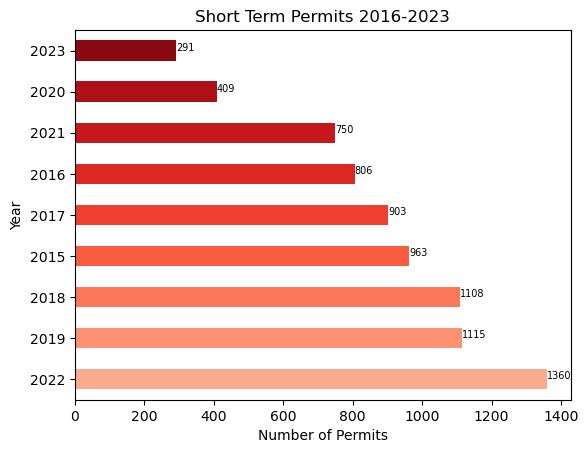

In [12]:
reds = plt.cm.Reds(np.linspace(0.3, 1, 10))
filtered_by_year.plot(kind='barh', color = reds)

plt.title('Short Term Permits 2016-2023')
plt.xlabel('Number of Permits')
plt.ylabel('Year')
for index,data in enumerate(filtered_by_year):
    plt.annotate(f"{data}", xy=(data,index), ha='left', fontsize=7)

plt.yticks(rotation=0)
plt.show()

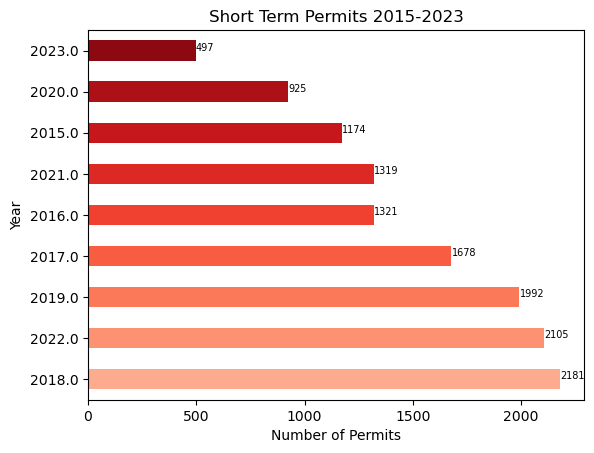

In [13]:
reds = plt.cm.Reds(np.linspace(0.3, 1, 10))
counts_by_year.plot(kind='barh', color = reds)

plt.title('Short Term Permits 2015-2023')
plt.xlabel('Number of Permits')
plt.ylabel('Year')
for index,data in enumerate(counts_by_year):
    plt.annotate(f"{data}", xy=(data,index), ha='left', fontsize=7)

plt.yticks(rotation=0)
plt.show()

In [14]:
zip_permits = filtered_permits.value_counts('ZIP')
zip_permits.head(10)

ZIP
37203    1341
37206    1056
37208     743
37212     652
37207     611
37209     565
37216     491
37201     366
37210     323
37204     280
dtype: int64

In [15]:
zip10_permits=zip_permits.head(10)
zip10_permits

ZIP
37203    1341
37206    1056
37208     743
37212     652
37207     611
37209     565
37216     491
37201     366
37210     323
37204     280
dtype: int64

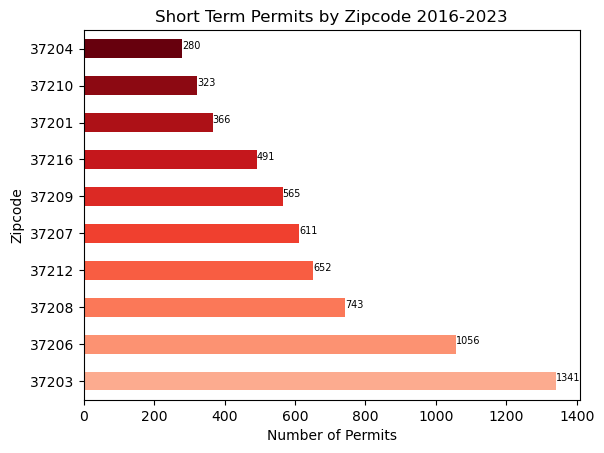

In [16]:
reds = plt.cm.Reds(np.linspace(0.3, 1, 10))
zip10_permits.plot(kind='barh', color = reds)

plt.title('Short Term Permits by Zipcode 2016-2023')
plt.xlabel('Number of Permits')
plt.ylabel('Zipcode')
for index,data in enumerate(zip10_permits):
    plt.annotate(f"{data}", xy=(data,index), ha='left', fontsize=7)

plt.yticks(rotation=0)
plt.show()